In [392]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import collections

Basic Overview of the Dataset

In [393]:
data= pd.read_csv("diabetes.csv")

In [394]:
data.shape

(768, 9)

In [395]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [396]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [397]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [398]:
data.duplicated().sum()

0

In [399]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [400]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Exploratory Data Analysis of DataSet

Data Analysis on Age

In [401]:
data['BMI'] = data['BMI'].replace(0, data['BMI'].median())

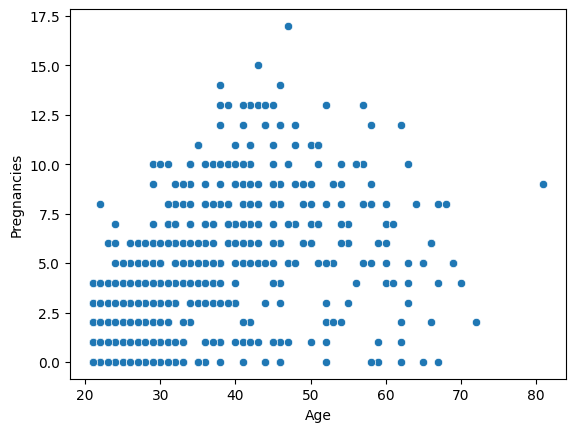

In [402]:
sns.scatterplot(x='Age', y='Pregnancies', data=data)
plt.show()

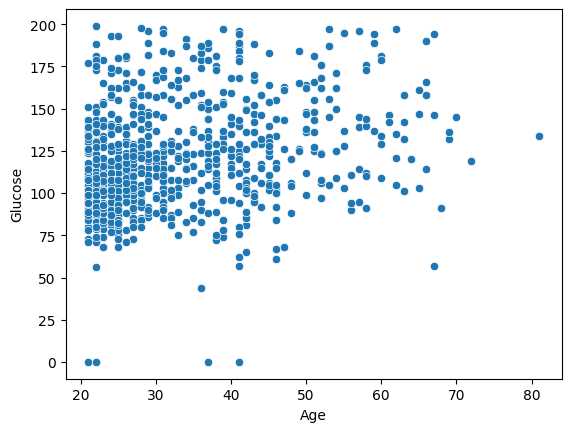

In [403]:
sns.scatterplot(x='Age', y='Glucose', data=data)
plt.show()

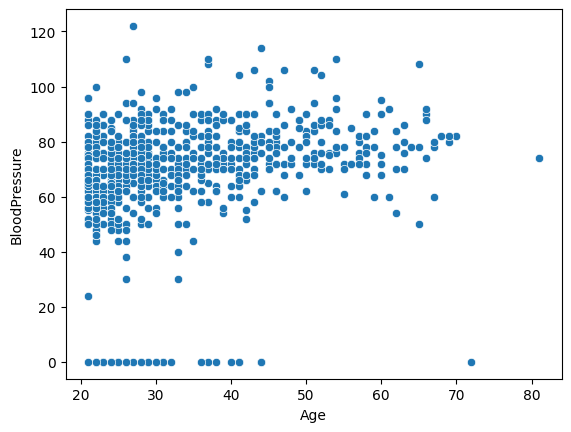

In [404]:
sns.scatterplot(x='Age', y='BloodPressure', data=data)
plt.show()

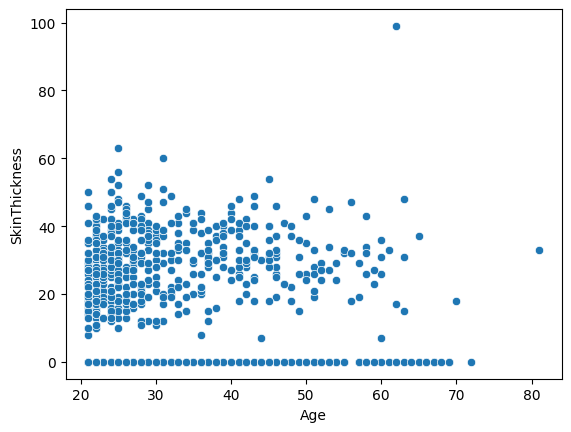

In [405]:
sns.scatterplot(x='Age', y='SkinThickness', data=data)
plt.show()

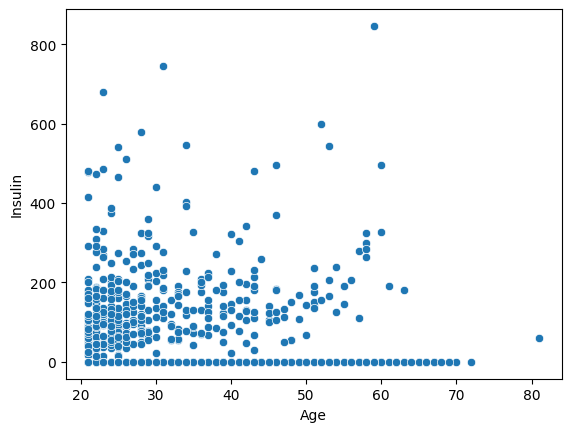

In [406]:
sns.scatterplot(x='Age', y='Insulin', data=data)
plt.show()

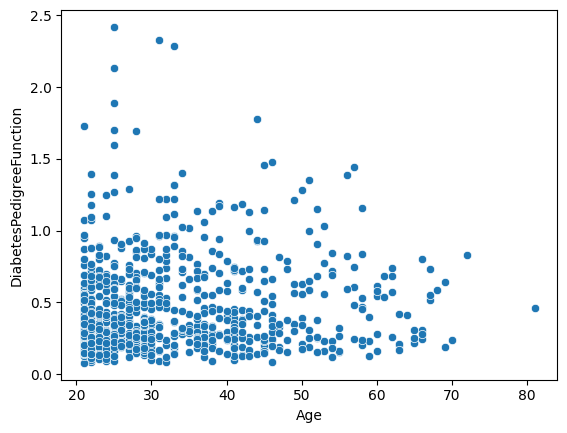

In [407]:
sns.scatterplot(x='Age', y='DiabetesPedigreeFunction', data=data)
plt.show()

<Axes: xlabel='Age', ylabel='BMI'>

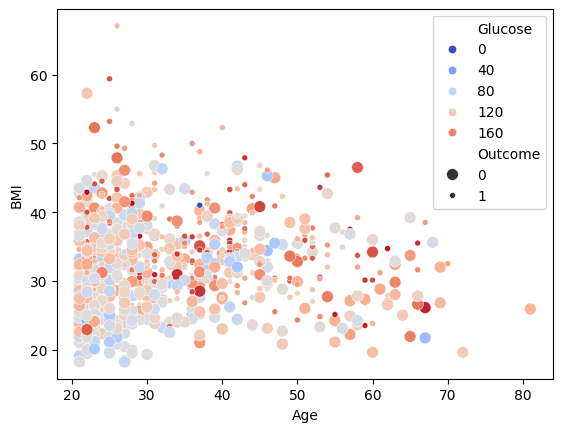

In [408]:
sns.scatterplot(data=data, x="Age", y="BMI", hue="Glucose", size="Outcome", palette="coolwarm")

<Axes: xlabel='Glucose', ylabel='Insulin'>

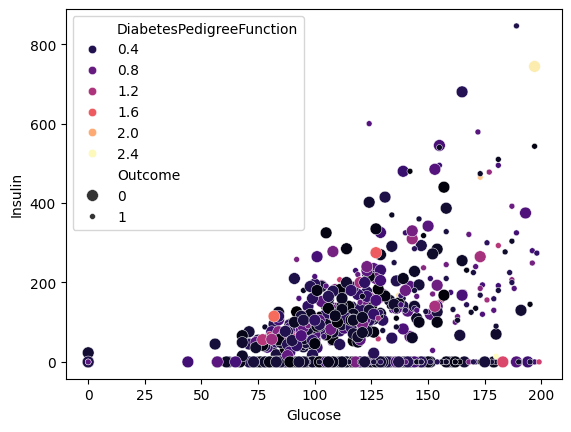

In [409]:
sns.scatterplot(data=data, x="Glucose", y="Insulin", hue="DiabetesPedigreeFunction", size="Outcome", palette="magma")

<Axes: xlabel='Age', ylabel='BloodPressure'>

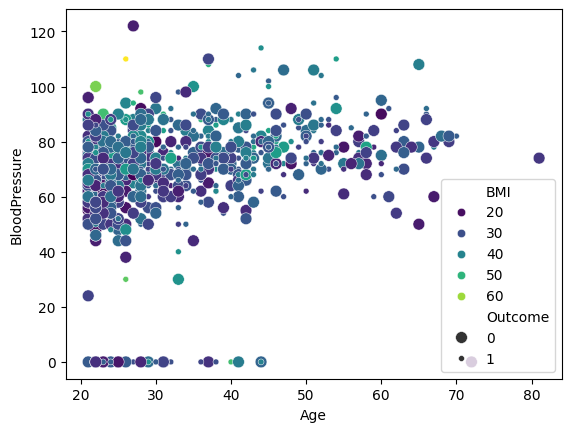

In [410]:
sns.scatterplot(data=data, x="Age", y="BloodPressure", hue="BMI", size="Outcome", palette="viridis")

<Axes: xlabel='Glucose', ylabel='Age'>

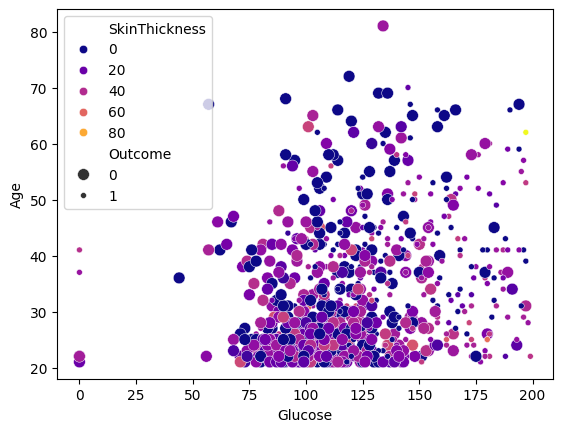

In [411]:
sns.scatterplot(data=data, x="Glucose", y="Age", hue="SkinThickness", size="Outcome", palette="plasma")

<Axes: xlabel='BMI', ylabel='Age'>

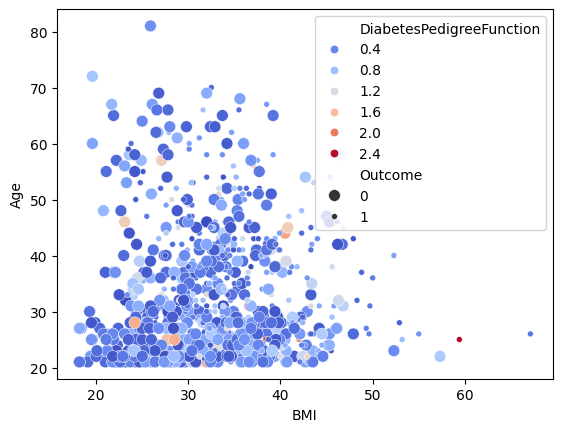

In [412]:
sns.scatterplot(data=data, x="BMI", y="Age", hue="DiabetesPedigreeFunction", size="Outcome", palette="coolwarm")

C:\Users\Aritro Saha\AppData\Local\Temp\ipykernel_37756\2509378785.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Age', data=data, palette="Set2")


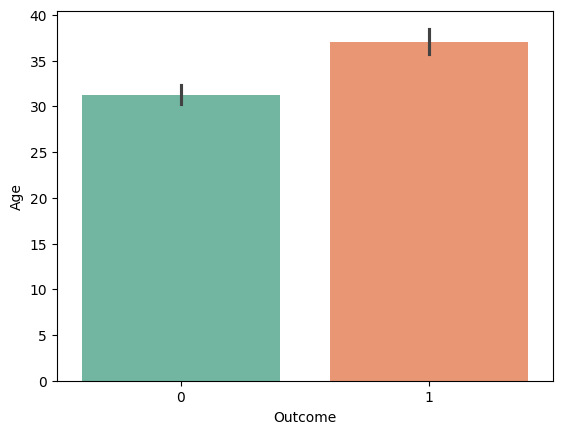

In [413]:
sns.barplot(x='Outcome', y='Age', data=data, palette="Set2")
plt.show()

C:\Users\Aritro Saha\AppData\Local\Temp\ipykernel_37756\1622730820.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outcome', y='Pregnancies', data=data, palette = "Set2")


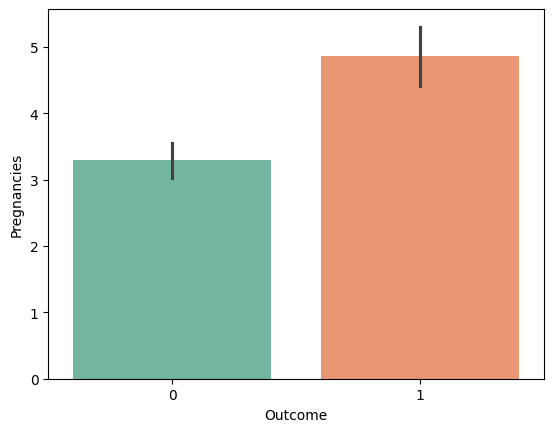

In [414]:
sns.barplot(x='Outcome', y='Pregnancies', data=data, palette = "Set2")
plt.show()

In [415]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

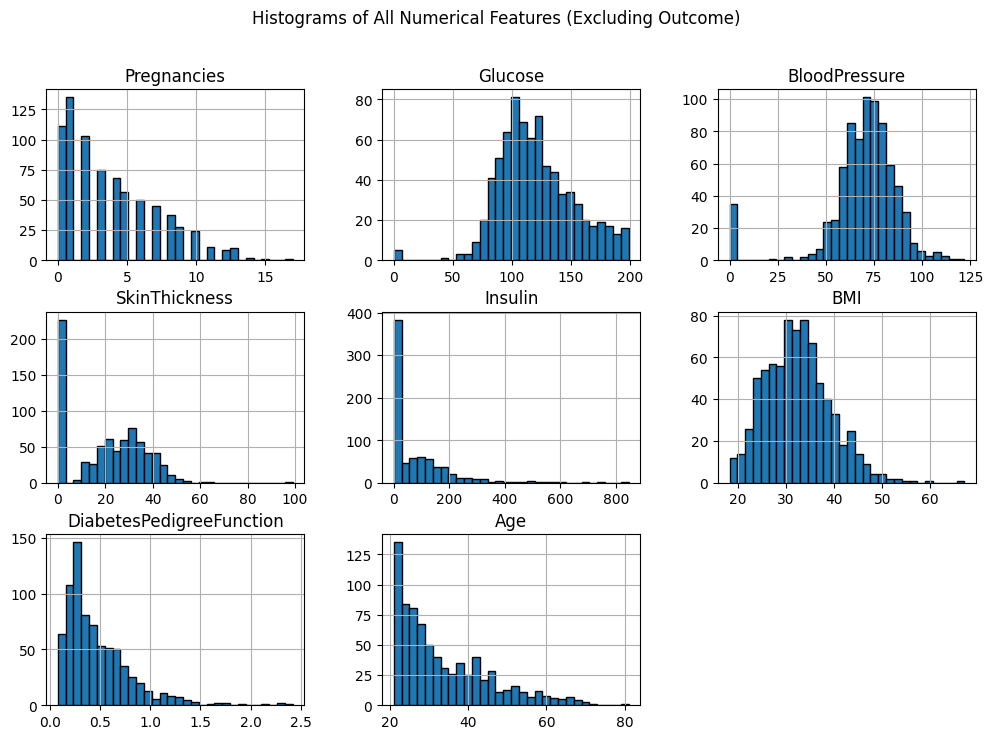

In [416]:
df_numeric = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                  'BMI', 'DiabetesPedigreeFunction', 'Age',]]

df_numeric.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms of All Numerical Features (Excluding Outcome)")
plt.show()

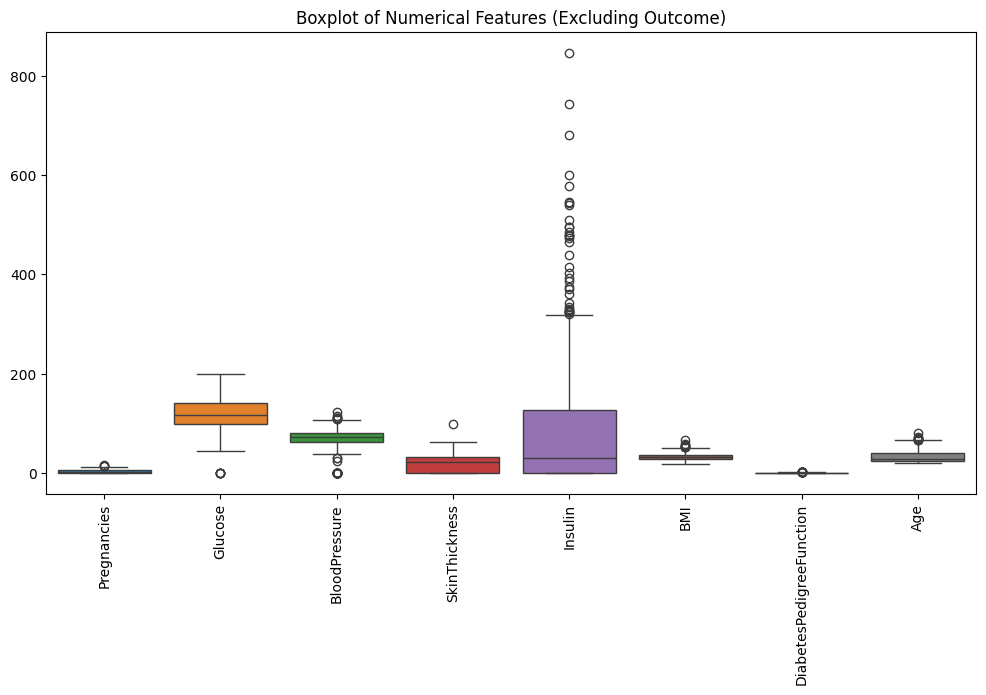

In [417]:
df_numeric = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                  'BMI', 'DiabetesPedigreeFunction', 'Age',]]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  
plt.title("Boxplot of Numerical Features (Excluding Outcome)")
plt.show()

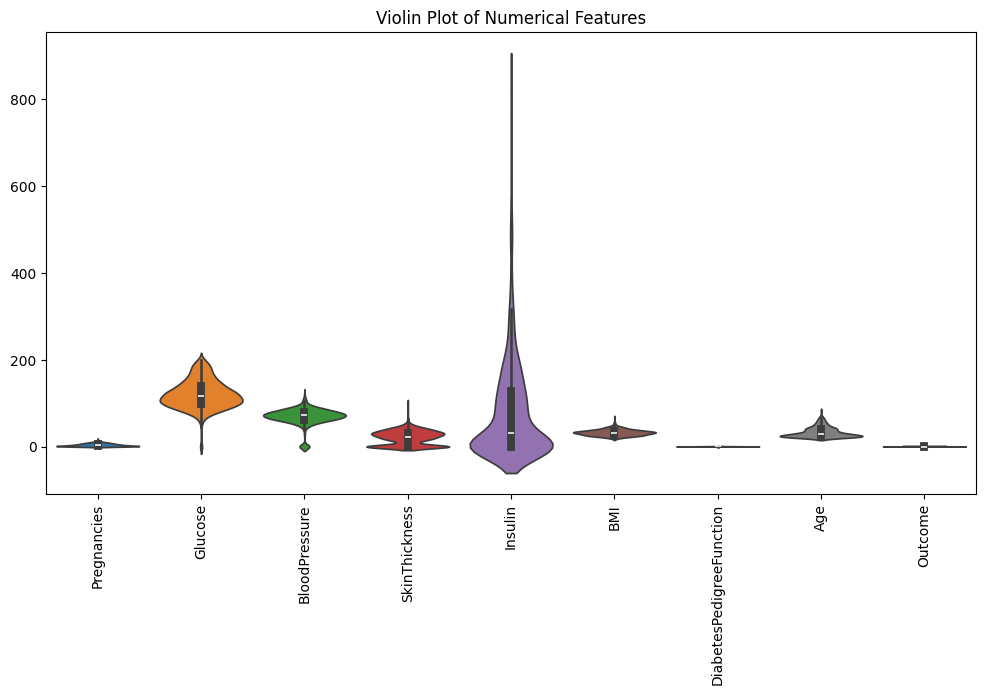

In [418]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data)
plt.xticks(rotation=90)
plt.title("Violin Plot of Numerical Features")
plt.show()


In [419]:
iqr_cols = ['Insulin', 'SkinThickness', 'Pregnancies', 'DiabetesPedigreeFunction']

df_cleaned = data.copy()

for col in iqr_cols:
    Q1 = df_cleaned[col].quantile(0.25)  
    Q3 = df_cleaned[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (768, 9)
Cleaned dataset shape: (698, 9)


In [420]:
iqr_cols = ['Insulin','DiabetesPedigreeFunction']

df_cleaned_2 = df_cleaned.copy()

for col in iqr_cols:
    Q1 = df_cleaned_2[col].quantile(0.25)  
    Q3 = df_cleaned_2[col].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.25 * IQR  
    upper_bound = Q3 + 1.25 * IQR  

    df_cleaned_2 = df_cleaned_2[(df_cleaned_2[col] >= lower_bound) & (df_cleaned_2[col] <= upper_bound)]

print(f"Original dataset shape: {df_cleaned.shape}")
print(f"Cleaned dataset shape: {df_cleaned_2.shape}")

Original dataset shape: (698, 9)
Cleaned dataset shape: (662, 9)


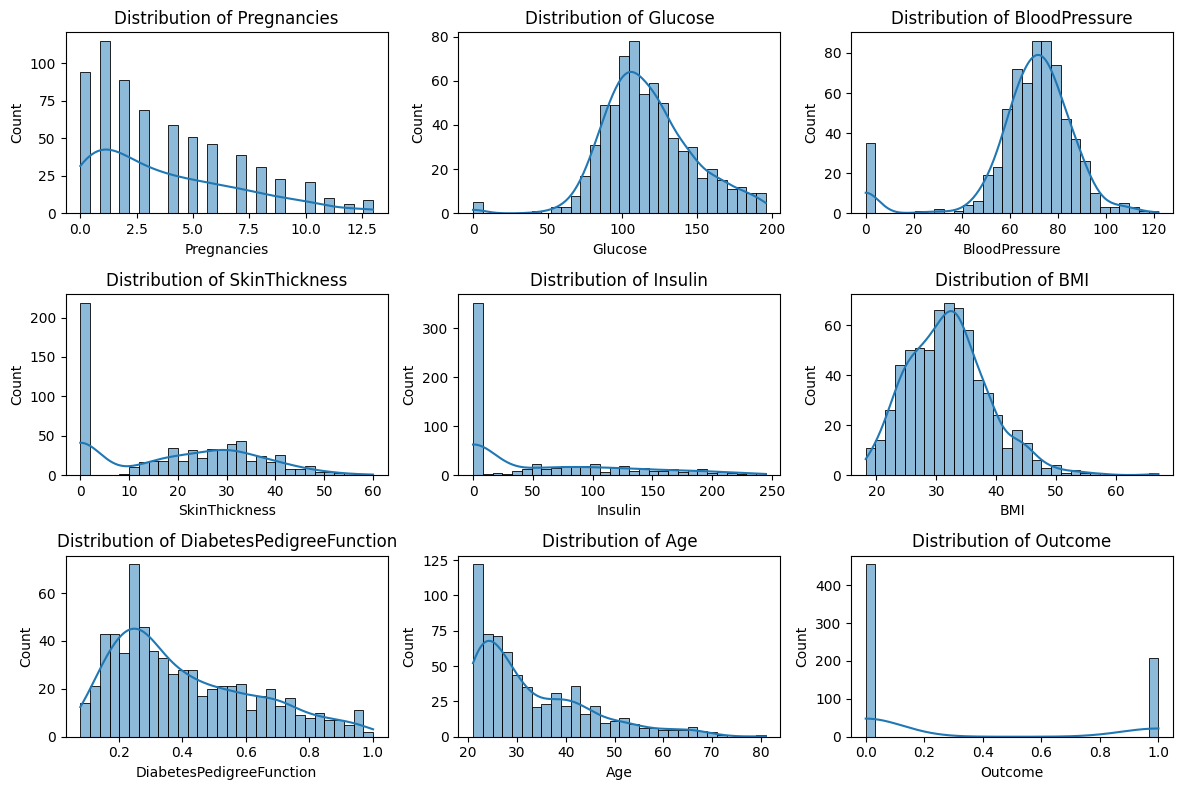

In [421]:
num_cols = df_cleaned_2.select_dtypes(include=[np.number]).columns.tolist()

num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)  
    sns.histplot(df_cleaned_2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


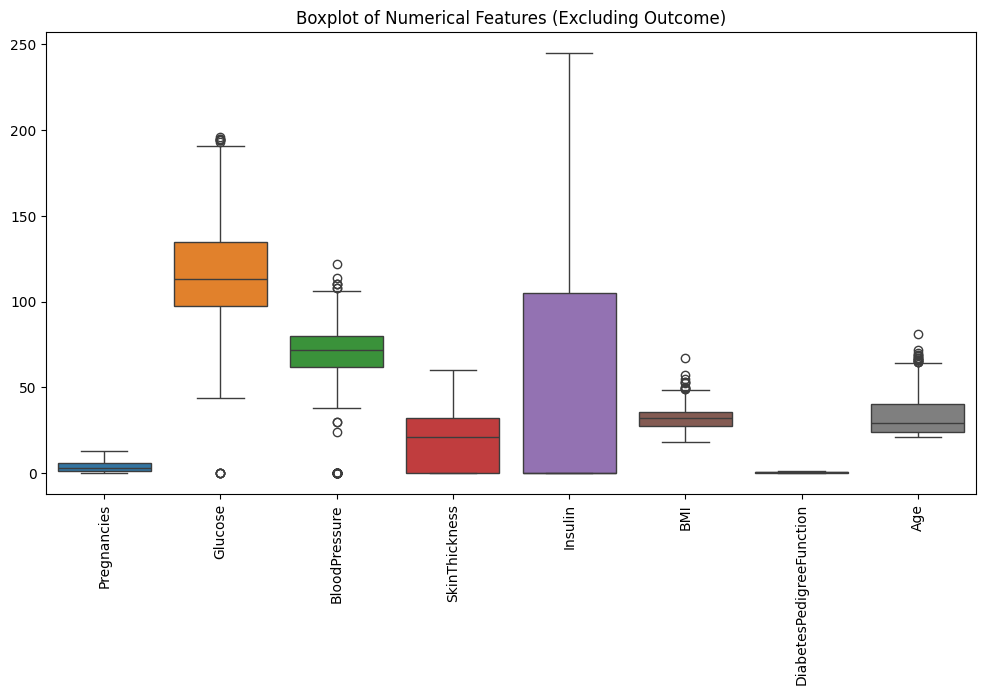

In [422]:
df_numeric = df_cleaned_2[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                  'BMI', 'DiabetesPedigreeFunction', 'Age',]]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_numeric)
plt.xticks(rotation=90)  
plt.title("Boxplot of Numerical Features (Excluding Outcome)")
plt.show()

In [423]:
zscore_cols = ['Glucose', 'BMI', 'BloodPressure', 'Age']  
z_thresh = 2.5  

z_scores = np.abs(zscore(df_cleaned_2[zscore_cols]))  
df_cleaned_3 = df_cleaned_2[(z_scores < z_thresh).all(axis=1)]

print(f"Original dataset shape: {df_cleaned_2.shape}")
print(f"Cleaned dataset shape: {df_cleaned_3.shape}")

Original dataset shape: (662, 9)
Cleaned dataset shape: (586, 9)


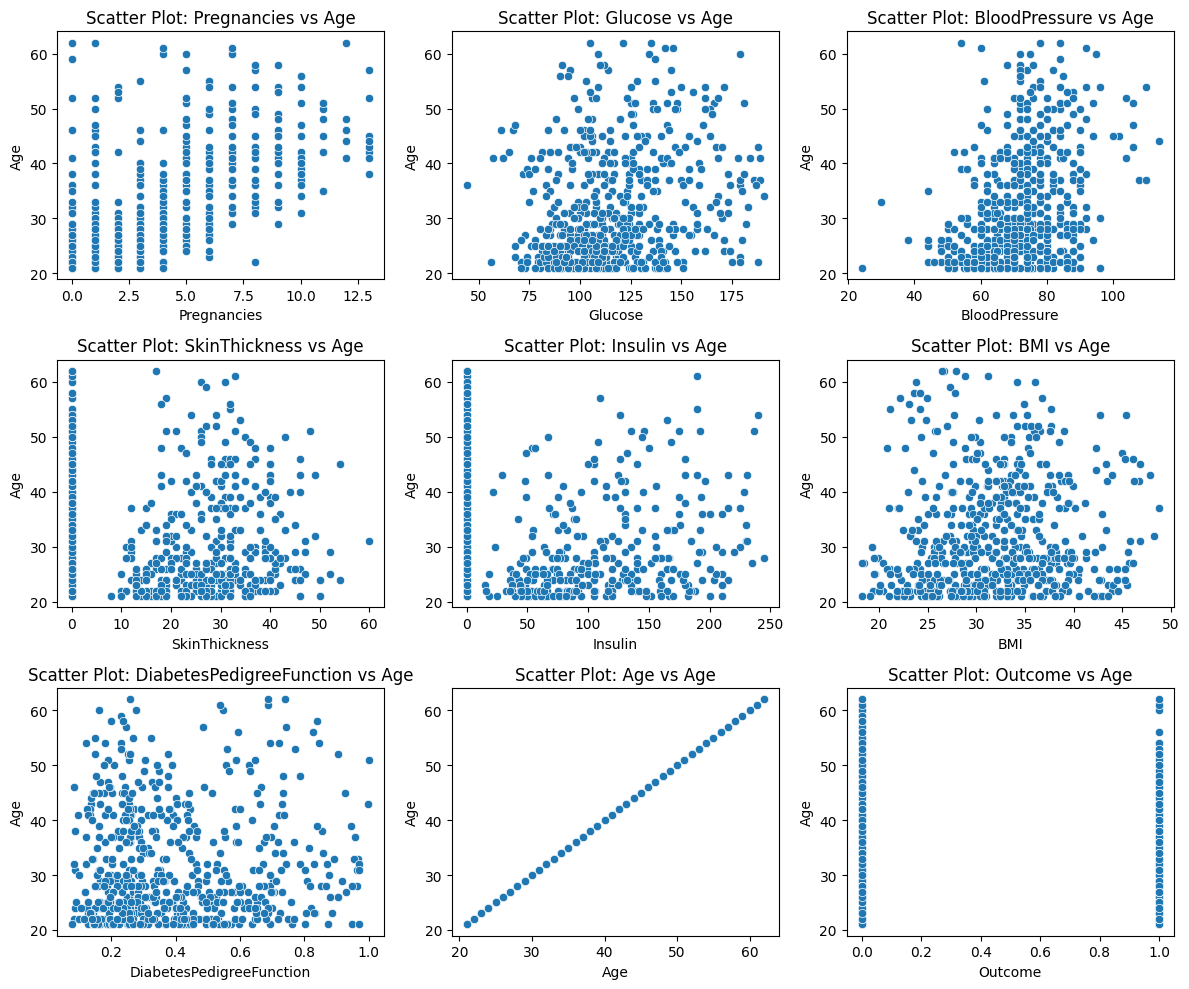

In [424]:
num_cols = df_cleaned_3.columns  

plt.figure(figsize=(12, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)  
    sns.scatterplot(x=df_cleaned_3[col], y=df_cleaned_3['Age'])
    plt.xlabel(col)
    plt.ylabel('Age')
    plt.title(f'Scatter Plot: {col} vs Age')
plt.tight_layout()
plt.show()

In [425]:
df_cleaned_3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [426]:
df_cleaned_3['Pregnancies'].max()

13

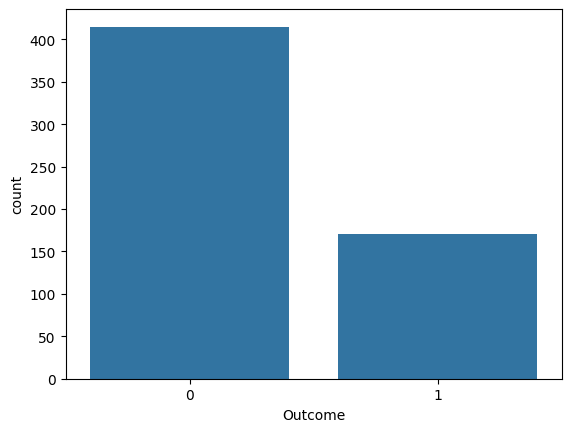

In [427]:
sns.countplot(x ='Outcome', data = df_cleaned_3)

plt.show()

In [428]:
df_cleaned_3.shape

(586, 9)

In [429]:
df_cleaned_3.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

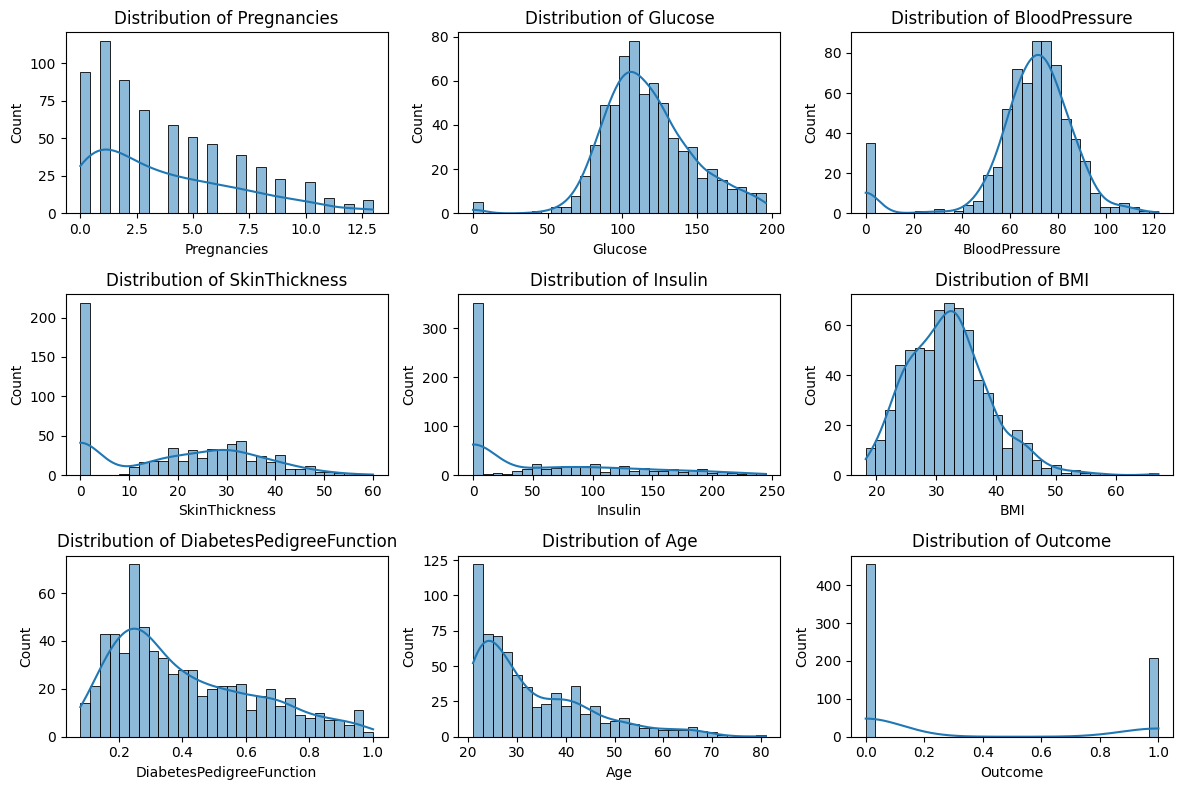

In [430]:
num_cols = df_cleaned_3.select_dtypes(include=[np.number]).columns.tolist()

num_plots = len(num_cols)
rows = (num_plots // 3) + (num_plots % 3 > 0)  

plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 3, i)  
    sns.histplot(df_cleaned_2[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()


In [431]:
X = df_cleaned_3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                  'BMI','DiabetesPedigreeFunction', 'Age']].values
y = df_cleaned_3['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", collections.Counter(y_train))
print("After SMOTE:", collections.Counter(y_train_smote))

columns = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI',
           'BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']
df_smote = pd.DataFrame(X_train_smote, columns=columns)
df_smote['Outcome'] = y_train_smote 

df_smote.to_csv("pima_diabetes_smote.csv", index=False)

print("SMOTE-applied dataset saved as 'pima_diabetes_smote.csv'")

Before SMOTE: Counter({0: 331, 1: 137})
After SMOTE: Counter({0: 331, 1: 331})
SMOTE-applied dataset saved as 'pima_diabetes_smote.csv'
